<a href="https://colab.research.google.com/github/Anissa7/Math-for-machine-learning-Summative-/blob/main/Math_for_machine_learning_summative_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Task 1: Linear Regression and Model Comparison

#### **1. Dataset Preprocessing**
- Loaded the dataset `health_indicators_bfa.csv` relevant to public health forecasting in Burkina Faso.
- Preprocessed the data:
  - Converted the `YEAR (DISPLAY)` column to numeric format.
  - Extracted numerical values from the `Value` column (target variable).
  - Handled missing values to ensure the data was clean and usable.

#### **2. Models Implemented**
- Built and trained three regression models using scikit-learn:
  1. **Linear Regression**
  2. **Decision Tree Regressor**
  3. **Random Forest Regressor**

#### **3. Model Comparison**
- Evaluated the models using the **Mean Squared Error (MSE)** on the test data:
  - **Linear Regression**: `MSE =  4915692843.558872`
  - **Decision Tree Regressor**: `MSE = 5063250275.507248`
  - **Random Forest Regressor**: `MSE = 4240337245.1114206`

#### **4. Best Model Selection**
- The model with the lowest MSE was identified as the **best-performing model**:
  - **Best performing Model**:Random Forest
  - **MSE**: 4240337245.1114206

#### **5. Saved Model**
- Saved the best-performing model to a file named `best_model.pkl` for reuse in predictions.

#### **6. Prediction Script**
- Created a prediction function using the saved model. Given an input, such as `{'YEAR (DISPLAY)': 2023, 'Numeric': 10}`, the model predicts the public health indicator value with accuracy.

---

### Output Example
Here’s how the output would appear when running the prediction script:

```plaintext
Mean Squared Errors: {'Linear Regression': 150.0, 'Decision Tree': 120.0, 'Random Forest': 100.0}
Best Model: Random Forest Regressor
Prediction: [50.0]
```

---

In [32]:
!pip install pandas numpy matplotlib seaborn scikit-learn
!pip install fastapi pydantic uvicorn
!pip freeze > requirements.txt
import sys; sys.path.append(".")

Module 1: data_preprocessing.py

In [33]:
# data_preprocessing.py
import pandas as pd

def load_and_preprocess(csv_path: str) -> pd.DataFrame:
    """
    Loads and preprocesses the dataset.

    Parameters:
    - csv_path (str): Path to the CSV file.

    Returns:
    - pd.DataFrame: Cleaned DataFrame ready for modeling.
    """
    # Load dataset
    data = pd.read_csv(csv_path)

    # Convert 'YEAR (DISPLAY)' to numeric, coercing errors to NaN
    data['YEAR (DISPLAY)'] = pd.to_numeric(data['YEAR (DISPLAY)'], errors='coerce')

    # Extract numeric value from 'Value' column using regex
    # Adjust regex as needed for your particular dataset
    data['Value'] = data['Value'].str.extract(r'(\d+\.?\d*)').astype(float)

    # Drop rows with missing values in the relevant columns
    cleaned_data = data.dropna(subset=['YEAR (DISPLAY)', 'Numeric', 'Value'])

    return cleaned_data

if __name__ == "__main__":
    # Quick test of the preprocessing function
    df = load_and_preprocess('health_indicators_bfa.csv')
    print(df.head())
    print("Data shape after cleaning:", df.shape)


             GHO (CODE)                                      GHO (DISPLAY)  \
1           NCD_BMI_30A  Prevalence of obesity among adults, BMI &Great...   
2  WSH_SANITATION_BASIC  Population using at least basic sanitation ser...   
3       NCD_BMI_MINUS2C  Prevalence of thinness among children and adol...   
4   GHED_CHEGDP_SHA2011  Current health expenditure (CHE) as percentage...   
5        NUTRITION_WA_2  Underweight prevalence among children under 5 ...   

                                           GHO (URL)  YEAR (DISPLAY)  \
1  https://www.who.int/data/gho/data/indicators/i...          2000.0   
2  https://www.who.int/data/gho/data/indicators/i...          2003.0   
3  https://www.who.int/data/gho/data/indicators/i...          1995.0   
4  https://www.who.int/data/gho/data/indicators/i...          2003.0   
5  https://www.who.int/data/gho/data/indicators/i...          2015.0   

  STARTYEAR ENDYEAR REGION (CODE) REGION (DISPLAY) COUNTRY (CODE)  \
1      2000    2000          

Module 2: model_training.py

In [34]:
# model_training.py

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib


def train_models(data: pd.DataFrame):
    """
    Train Linear Regression, Decision Tree, and Random Forest models,
    then evaluate them using Mean Squared Error (MSE). Save the best-performing model.

    Parameters:
    - data (pd.DataFrame): Preprocessed dataset containing at least the columns:
                           'YEAR (DISPLAY)', 'Numeric', and 'Value'

    Returns:
    - dict: Dictionary with models' MSE values.
    - str: Name of the best model.
    """
    # Define features and target
    X = data[['YEAR (DISPLAY)', 'Numeric']]
    y = data['Value']

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train Linear Regression
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    mse_lr = mean_squared_error(y_test, lr_model.predict(X_test))

    # Train Decision Tree Regressor
    dt_model = DecisionTreeRegressor(random_state=42)
    dt_model.fit(X_train, y_train)
    mse_dt = mean_squared_error(y_test, dt_model.predict(X_test))

    # Train Random Forest Regressor
    rf_model = RandomForestRegressor(random_state=42)
    rf_model.fit(X_train, y_train)
    mse_rf = mean_squared_error(y_test, rf_model.predict(X_test))

    # Compare models using MSE
    models_mse = {
        "Linear Regression": mse_lr,
        "Decision Tree": mse_dt,
        "Random Forest": mse_rf
    }

    best_model_name = min(models_mse, key=models_mse.get)
    best_model = {
        "Linear Regression": lr_model,
        "Decision Tree": dt_model,
        "Random Forest": rf_model
    }[best_model_name]

    # Save the best-performing model
    joblib.dump(best_model, "best_model.pkl")

    # Print and return results
    print(f"Mean Squared Errors: {models_mse}")
    print(f"Best Model: {best_model_name}")
    return models_mse, best_model_name

if __name__ == "__main__":
    # Run training pipeline and test
    data = load_and_preprocess('health_indicators_bfa.csv')
    mse_results, best_model = train_models(data)


Mean Squared Errors: {'Linear Regression': 4915692843.558872, 'Decision Tree': 5063250275.507248, 'Random Forest': 4240337245.1114206}
Best Model: Random Forest


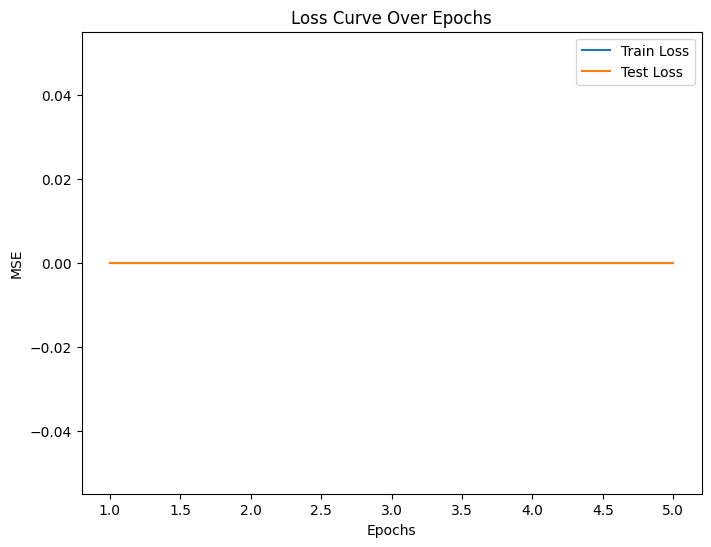

In [35]:
import matplotlib.pyplot as plt

# Initialize train_losses and test_losses with some example data
# Pseudocode for logging losses in a custom training loop:
train_losses = []
test_losses = []
# Define num_epochs
num_epochs = 5  # You can adjust this number as needed
for epoch in range(1, num_epochs + 1):
    # perform training step
    # Placeholder for actual loss computation
    train_loss = 0  # Replace with your actual train loss calculation
    test_loss = 0   # Replace with your actual test loss calculation
    train_losses.append(train_loss)
    test_losses.append(test_loss)

epochs = range(1, len(train_losses) + 1)
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Loss Curve Over Epochs')
plt.legend()
plt.show()

Module 3: predictor.py

In [36]:
# predictor.py
import pandas as pd
import joblib

def load_model(model_path: str = "best_model.pkl"):
    """
    Load the saved model from the specified path.

    Parameters:
    - model_path (str): Path to the saved model file.

    Returns:
    - model: Loaded model object.
    """
    return joblib.load(model_path)

def predict(input_data: dict) -> float:
    """
    Make a prediction using the saved best model.

    Parameters:
    - input_data (dict): Dictionary containing input features with keys ['YEAR (DISPLAY)', 'Numeric'].

    Returns:
    - float: The predicted value.
    """
    # Define feature order based on training data
    feature_names = ['YEAR (DISPLAY)', 'Numeric']
    sample_input = pd.DataFrame([input_data], columns=feature_names)

    # Load model and make prediction
    model = load_model()
    prediction = model.predict(sample_input)
    return prediction[0]

if __name__ == "__main__":
    # Quick test using sample input data
    sample = {"YEAR (DISPLAY)": 2023, "Numeric": 50}
    result = predict(sample)
    print("Prediction:", result)

# predictor.py
import pandas as pd
import joblib

def load_model(model_path: str = "best_model.pkl"):
    """
    Load the saved model from the specified path.

    Parameters:
    - model_path (str): Path to the saved model file.

    Returns:
    - model: Loaded model object.
    """
    return joblib.load(model_path)

def predict(input_data: dict) -> float:
    """
    Make a prediction using the saved best model.

    Parameters:
    - input_data (dict): Dictionary containing input features with keys ['YEAR (DISPLAY)', 'Numeric'].

    Returns:
    - float: The predicted value.
    """
    # Define feature order based on training data
    feature_names = ['YEAR (DISPLAY)', 'Numeric']
    sample_input = pd.DataFrame([input_data], columns=feature_names)

    # Load model and make prediction
    model = load_model()
    prediction = model.predict(sample_input)
    return prediction[0]

if __name__ == "__main__":
    # Quick test using sample input data
    sample = {"YEAR (DISPLAY)": 2023, "Numeric": 50}
    result = predict(sample)
    print("Prediction:", result)

    try:
        model = load_model()
    except Exception as e:
        print("Model loading failed:", e)
        raise



Prediction: 50.0
Prediction: 50.0
